# Assignment Questions (40 Points)

# Data Preparation (7 Points)

## Import the necessary libraries

In [10]:
import random
random.seed(1310) # last 4 GUID digits
from seaborn.palettes import color_palette
from seaborn import set_palette
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load the dataset and display the dataframe (2 Points).


In [2]:
filename = '../HW2/creditcard.csv'
CC = pd.read_csv(filename)

CC.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


## Use `describe` to provide statistics on the pandas Dataframe (2 Points).


In [3]:
# Add code here
CC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Convert To Correct Dtypes and Clean DataFrame


In [4]:
# Class is categorical variables but is encoded as integer
CC['Class'] = CC['Class'].astype('category')

# Drop NA's if any

CC.dropna(inplace=True)

## Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points).


In [5]:
X_train, X_test, y_train, y_test = train_test_split(CC.iloc[:,0:-2],
                                        CC.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=42)

# Reset and drop indexes after splitting, convert to numpy arrays and flatten
X_train.reset_index(inplace=True)
X_train = X_train.to_numpy()
y_train = y_train.reset_index().drop("index", axis=1).astype('category')
y_train = y_train.to_numpy().reshape(len(y_train),)

X_test.reset_index(inplace=True)
X_test = X_test.to_numpy()
y_test = y_test.reset_index().drop("index", axis=1).astype('category')
y_test = y_test.to_numpy().reshape(len(y_test),)

We split the dataset into training and test sets using `scikit-learn`'s `train_test_split` function. We use a 66.67/33.33 % split for training and testing respectively. Usually, I prefer a 80-20 train-test split; however, given the already known fact that the ensemble models perform very well on the credit card dataset, as seen in HW2, we can employ a more stringent split to assess the reliability of how these models generalize to more unseen data. We use a random state of 42 to ensure reproducibility.

# Classification Routine (12 Points)

Execute a classification routine using RandomForestClassifier(), BaggingClassifier(), and XGboostclassifier(). Independently output the accuracy box plot as discussed in class. Use any package you are comfortable with (seaborn, matplotlib).

## RandomForestClassifier()


In [13]:
%%time
RF = RandomForestClassifier()

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

RF_accuracy = cross_val_score(RF, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

RF_weighted_f1 = cross_val_score(RF, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

mean_accuracy_percentage = RF_accuracy.mean() * 100
mean_weighted_f1_percentage = RF_weighted_f1.mean() * 100

print('Random Forest Mean Accuracy: %.3f, Mean Weighted F1: %.3f' % (mean_accuracy_percentage, mean_weighted_f1_percentage))

Random Forest Mean Accuracy: 99.948, Mean Weighted F1: 99.944
CPU times: user 93.6 ms, sys: 152 ms, total: 245 ms
Wall time: 9min 7s


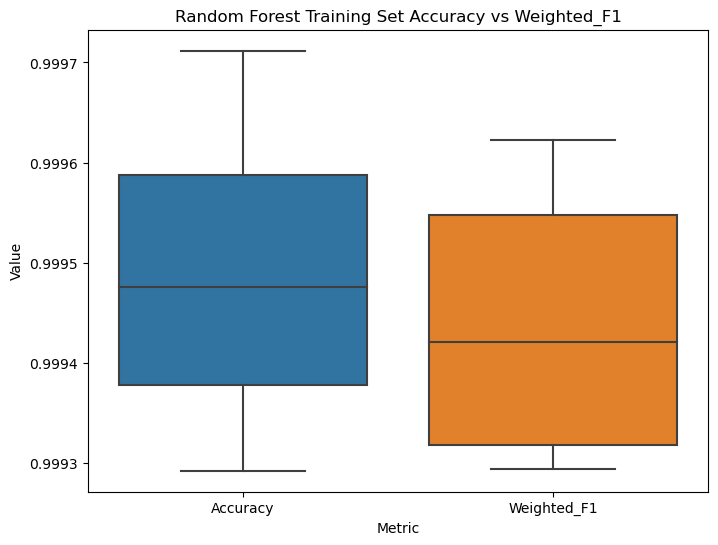

<Figure size 640x480 with 0 Axes>

In [15]:
results = {}
results['Accuracy'] = RF_accuracy
results['Weighted_F1'] = RF_weighted_f1

RF_mod = pd.DataFrame(results)

# Melt the DataFrame to have 'Metric' as a new column indicating Accuracy or Weighted_F1
RF_mod_melted = pd.melt(RF_mod, value_vars=['Accuracy', 'Weighted_F1'], var_name='Metric', value_name='Value')

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Value', data=RF_mod_melted)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Random Forest Training Set Accuracy vs Weighted_F1')
plt.show()
plt.savefig('products/plots/RF_Box.jpeg')

Both training set metrics Accuracy and Weighted f1-score are ~1 or 100%, indicating that the `RandomForestClassifier` model captures all the underlying ground truth of the data. Weighted f1-score is slightly lower than accuracy, which is expected, because it takes into account the classifier's performance on predicting a highly imbalanced response, `Class`. Still, weighted f1-score is the preferred metric for this dataset as it provides a more truthful representation than accuracy alone of the classifier's ability to capture the data's variability. 

Next, we will assess the classifier's performance on the test dataset to understand whether it is overfitting the training data. We can also try to tune the hyperparameters to see if we can improve the model's performance and this experiment is performed in the next sections.

In [16]:
%%time

RF.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/RF.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(RF, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Random Forest Test Set Accuracy: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

Random Forest Test Set Accuracy: 99.96 %
CPU times: user 2min 23s, sys: 1.04 s, total: 2min 24s
Wall time: 2min 25s


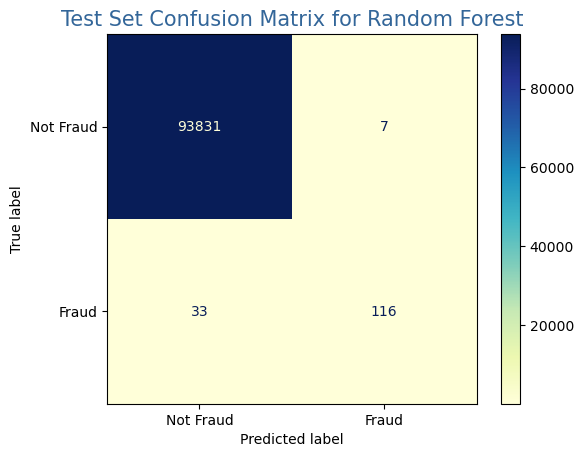

In [17]:
conf_matrix = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Random Forest', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_RF.png')

The base or untuned `RandomForestClassifier` performs exceptionally well on unseen data as shown by the confusion matrix above. The model captures almost all the non-fraudulent (majority) transactions in the test set, and fails to correctly predict 33 fraudulent transactions. Therefore, the model has a very low false positive rate. Not being able to correctly predict 33 fraudulent records could harm the credit card company significantly. It could be safer to label Not Fraud transactions as Fraud transactions instead and alleviate customers’ financial problems. The model's performance, in terms of accuracy and weighted f1-score, on the test set is very similar to the training set, indicating that the model is not overfitting the training data.

We shall see later if we can improve the model's performance on predicting more true negatives by tuning its hyperparameters.

## BaggingClassifier()


In [18]:
%%time

Bagging = BaggingClassifier()

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

Bagging_accuracy = cross_val_score(Bagging, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

Bagging_weighted_f1 = cross_val_score(Bagging, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

mean_accuracy_percentage = Bagging_accuracy.mean() * 100
mean_weighted_f1_percentage = Bagging_weighted_f1.mean() * 100

print('Bagging Mean Accuracy: %.3f, Mean Weighted F1: %.3f' % (mean_accuracy_percentage, mean_weighted_f1_percentage))

Bagging Mean Accuracy: 99.942, Mean Weighted F1: 99.940
CPU times: user 253 ms, sys: 355 ms, total: 608 ms
Wall time: 5min 1s


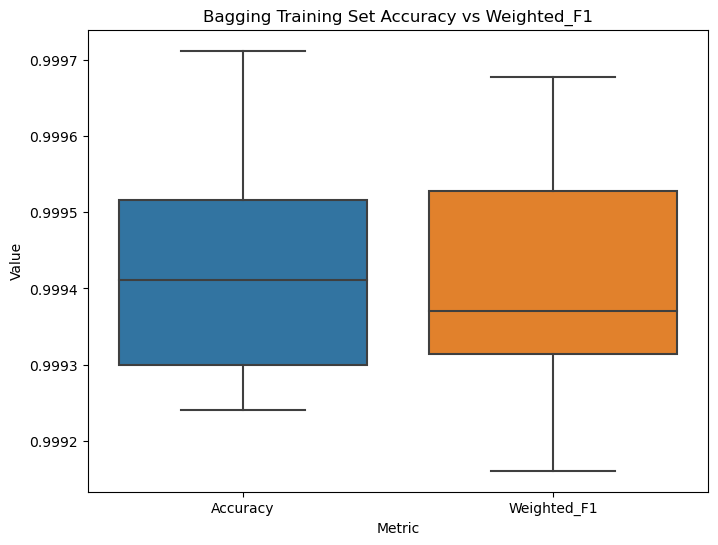

<Figure size 640x480 with 0 Axes>

In [19]:
results = {}
results['Accuracy'] = Bagging_accuracy
results['Weighted_F1'] = Bagging_weighted_f1

Bagging_mod = pd.DataFrame(results)

# Melt the DataFrame to have 'Metric' as a new column indicating Accuracy or Weighted_F1
Bagging_mod_melted = pd.melt(Bagging_mod, value_vars=['Accuracy', 'Weighted_F1'], var_name='Metric', value_name='Value')

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Value', data=Bagging_mod_melted)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Bagging Training Set Accuracy vs Weighted_F1')
plt.show()
plt.savefig('products/plots/Bagging_Box.jpeg')

Both training set metrics Accuracy and Weighted f1-score are ~1 or 100%, indicating that the `BaggingClassifier` model captures all the underlying ground truth of the data. The upper and lower quartiles of the cross-validated Weighted f1-scores, unlike that of the untuned Random Forest classifier, are higher than those of accuracy. The collected accuracy scores from cross-validation seem to have more variance between 0.9992 and 0.9997 than weighted f1-score does. Still, weighted f1-score is the preferred metric for this dataset as it provides a more truthful representation than accuracy alone of the classifier's ability to capture the data's variability. On the training data, it can be concluded that `RandomForestClassifier` performs slightly better.

Next, we will assess the classifier's performance on the test dataset to understand whether it is overfitting the training data. We can also try to tune the hyperparameters to see if we can improve the model's performance and this experiment is performed in the next sections.

In [20]:
%%time

Bagging.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/Bagging.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(Bagging, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Bagging Test Set Accuracy: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

Bagging Test Set Accuracy: 99.96 %
CPU times: user 1min 30s, sys: 665 ms, total: 1min 31s
Wall time: 1min 31s


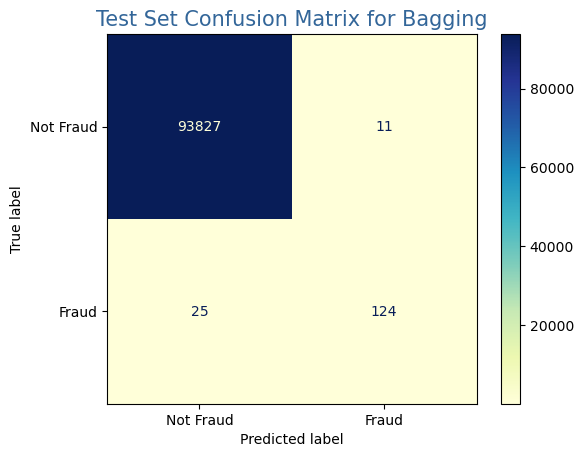

In [21]:
conf_matrix = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Bagging', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_Bagging.png')

Wow, although the untuned `RandomForestClassifier` performed better, in terms of accuracy and weighted f1-score, on the training set, the untuned `BaggingClassifier` performs better than `RandomForestClassifier`  on the test set, which is a more accurate indicator of model overfitting and overall performance. `BaggingClassifier` misclassified 36 observations, with 25 false negatives and 11 false positives, compared to `RandomForestClassifier`'s 40 misclassifications, with 33 false negatives and 7 false positives. Therefore, because the untuned `BaggingClassifier` is more suitable for the business case of alleviating fraudulent transactions, it is the preferred model over `RandomForestClassifier` for this dataset. 

We shall see later if we can improve the model's performance on predicting more true negatives by tuning its hyperparameters.

## XGboostclassifier()


In [22]:
%%time

XGB = XGBClassifier()

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

XGB_accuracy = cross_val_score(XGB, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

XGB_weighted_f1 = cross_val_score(XGB, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

mean_accuracy_percentage = XGB_accuracy.mean() * 100
mean_weighted_f1_percentage = XGB_weighted_f1.mean() * 100

print('XGBoost Mean Accuracy: %.3f, Mean Weighted F1: %.3f' % (mean_accuracy_percentage, mean_weighted_f1_percentage))

XGBoost Mean Accuracy: 99.950, Mean Weighted F1: 99.947
CPU times: user 276 ms, sys: 248 ms, total: 524 ms
Wall time: 9.5 s


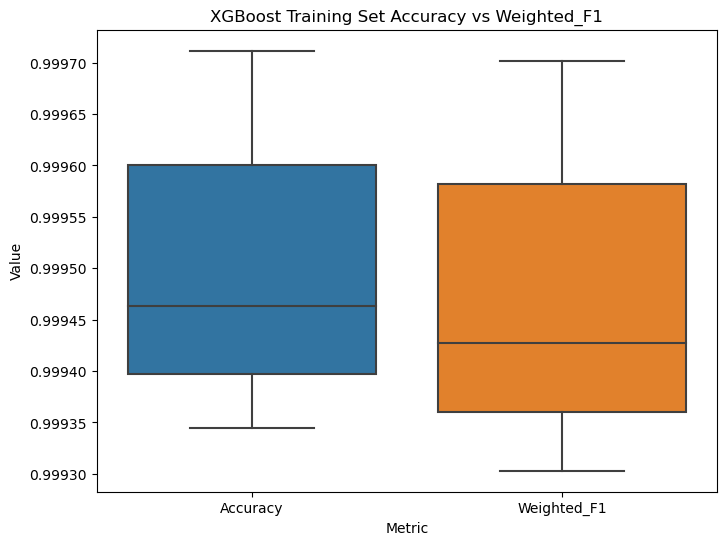

<Figure size 640x480 with 0 Axes>

In [23]:
results = {}
results['Accuracy'] = XGB_accuracy
results['Weighted_F1'] = XGB_weighted_f1

XGB_mod = pd.DataFrame(results)

# Melt the DataFrame to have 'Metric' as a new column indicating Accuracy or Weighted_F1
XGB_mod_melted = pd.melt(XGB_mod, value_vars=['Accuracy', 'Weighted_F1'], var_name='Metric', value_name='Value')

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Value', data=XGB_mod_melted)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('XGBoost Training Set Accuracy vs Weighted_F1')
plt.show()
plt.savefig('products/plots/XGB_Box.jpeg')

From the boxplot above, we can observe that `XGBClassifier` performs better than `RandomForestClassifier` and `BaggingClassifier`, given that its lower and upper fences of accuracy and weighted f1-scores are higher. Its performance on weighted f1-score is similar to that of `RandomForestClassifier`, because its accuracy spread is slightly higher. Still, weighted f1-score is the preferred metric for this dataset as it provides a more truthful representation than accuracy alone of the classifier's ability to capture the data's variability. Moreover, it took a mere 9 seconds to train the model, which is much faster than the other two models. 

Next, we will assess the classifier's performance on the test dataset to understand whether it is overfitting the training data. We can also try to tune the hyperparameters to see if we can improve the model's performance and this experiment is performed in the next sections.

In [24]:
%%time

XGB.fit(X_train, y_train)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/XGB.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(XGB, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("XGBoost Test Set Accuracy: {0:.2f} %".format(100 * score))
  Y_predict = pickle_model.predict(X_test)

XGBoost Test Set Accuracy: 99.96 %
CPU times: user 4.5 s, sys: 1.58 s, total: 6.08 s
Wall time: 1.12 s


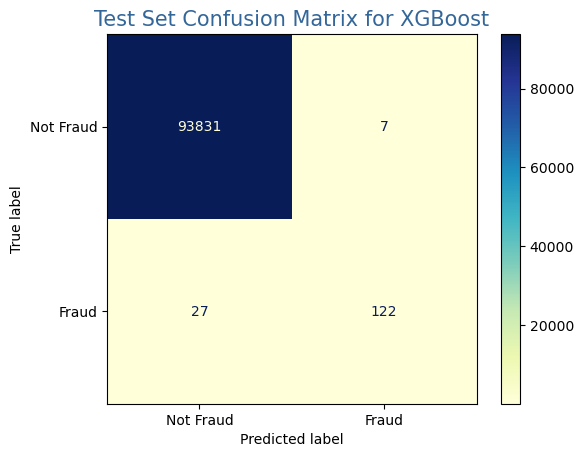

In [25]:
conf_matrix = confusion_matrix(y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for XGBoost', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_XGB.png')

From the confusion matrix above, we can observe that the untuned `XGBClassifier` performs better than `RandomForestClassifier` and `BaggingClassifier` on the test set. It misclassified 34 observations, with 27 false negatives and 7 false positives, compared to `RandomForestClassifier`'s 40 misclassifications, with 33 false negatives and 7 false positives, and `BaggingClassifier`'s 36 misclassifications, with 25 false negatives and 11 false positives. Although `BaggingClassifier` has two fewer false negatives, which is still significant in the business context, the efficiency of the untuned `XGBClassifier` is more suitable for deploying in a production environment, especially for a financial business that relies on predicting fraudulent transactions on time before they can occur. Therefore, it is the preferred model over `RandomForestClassifier` and `BaggingClassifier` for this dataset.

# Classification with GridSearchCV (8 Points)

## RandomForestClassifier()


In [34]:
%%time

# defining parameter range
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 3, 5],
  'criterion': ["gini", "entropy"],
  'min_samples_leaf': [0.1, 0.3, 0.5],
  'max_features': [0.1*X_train.shape[1], 0.3*X_train.shape[1], 0.5*X_train.shape[1], X_train.shape[1]],
}
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0, scoring='f1_weighted', cv = 5, n_jobs=-1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/RF_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Random Forest Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

The best parameters after tuning are:  {'criterion': 'gini', 'max_depth': None, 'max_features': 30, 'min_samples_leaf': 0.1, 'n_estimators': 50}
The best model after tuning looks like:  RandomForestClassifier(max_features=30, min_samples_leaf=0.1, n_estimators=50)
Grid-Search Tuned Random Forest Test Set Accuracy: 99.76 %
CPU times: user 49.8 s, sys: 917 ms, total: 50.7 s
Wall time: 39min 12s


After performing `GridSearchCV`, the optimal hyperparameters for maximizing weighted f1-score for `RandomForestClassifier`, are:

1. 50 `n_estimators` (number of trees in the forest). This is a good sign because it is not too high, which would increase the computational cost, and not too low, which would increase the bias of the model.
2. `max_depth` is None, signifying the tree nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
3. `critertion` is gini, which is the default, and is chosen over entropy. Both are used to measure the quality of a split.
4. `max_features` is 30, which is all the features in the dataset.
5. `min_samples_leaf` is 0.1, which is 10% of the total number of samples in the dataset and they correspond to the minimum number of samples for each node.

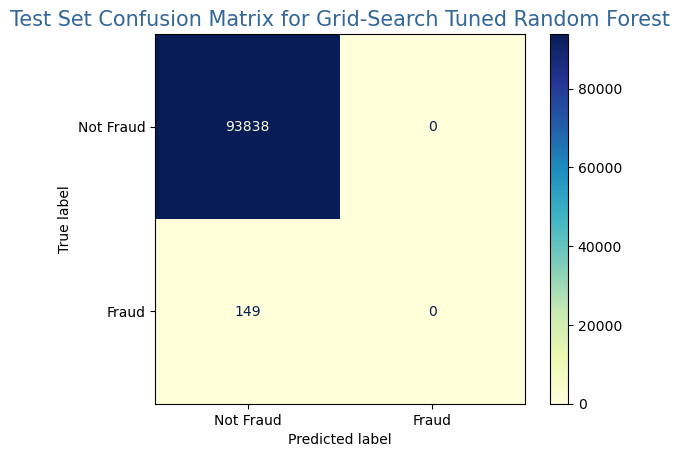

In [36]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned Random Forest', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_RF_Grid_Tuned.png')

The test accuracy of the untuned `RandomForestClassifier` was (93831+116)/(93831+116+40) * 100 = 99.957%, compared to 99.76 % for the `RandomForestClassifier` tuned with `GridSearchCV`. Since we chose the best hyperparameters for maximizing weighted f1-score, we can expect the tuned model to perform better on the test set than the untuned model. However, this is not the case. The tuned model misclassified all Fraud observations (minority class), with 149 false negatives and 0 false positives, compared to the untuned model's 40 misclassifications, with 33 false negatives and 7 false positives. Therefore, the tuned model performs worse than the untuned model and, in fact, the tuned classifier would get rejected outright when deploying in production. This could be because the tuned model is overfitting the training data.

Maybe if we tune the model with a different scoring metric, such as accuracy, we can improve the model's performance on the test set. However, accuracy for this dataset is not a good metric because the response variable is highly imbalanced. Therefore, we will not perform this experiment and conclude that the default set of hyperparameters are best for this dataset. Also, `GridSearchCV` took 39 minutes to train the different models with all combinations of specified hyperparameters (216). We will later see if we can obtain not only a better `RandomForestClassifier` but also obtain it quicker with `RandomizedSearchCV`.

## BaggingClassifier()


In [49]:
%%time

# defining parameter range
param_grid = {
    # 'n_estimators': [50, 100],
    # 'max_samples': [int(0.1*X_train.shape[0]), int(0.3*X_train.shape[0]), int(0.5*X_train.shape[0]), int(0.7*X_train.shape[0])],
    # 'max_features': [0.15, 0.3, 0.45, 0.6, 0.75, 0.9], # 'sqrt', 'log2' raise ValueError (applicable for RandomForestClassifier)
    'bootstrap_features': [True, False],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'warm_start': [True, False],
}
  
grid = GridSearchCV(BaggingClassifier(verbose=0), param_grid, refit = True, verbose = 0, scoring='f1_weighted', cv = 5, n_jobs=-1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/Bagging_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Bagging Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/p

The best parameters after tuning are:  {'bootstrap': True, 'bootstrap_features': True, 'oob_score': False, 'warm_start': False}
The best model after tuning looks like:  BaggingClassifier(bootstrap_features=True)
Grid-Search Tuned Bagging Test Set Accuracy: 99.96 %
CPU times: user 1min 28s, sys: 555 ms, total: 1min 29s
Wall time: 12min 56s


After performing `GridSearchCV`, the optimal hyperparameters for maximizing weighted f1-score for `BaggingClassifier`, are:

1. 10 `n_estimators` (number of `DecisionTreeClassifier`s in the ensemble) which is the default. This is a good sign because it is not too high, which would increase the computational cost, and not too low, which would increase the bias of the model.
2. `max_samples` is 1.0, signifying that all training samples are chosen to train each base estimator.
3. `max_features` is 1.0, which also signifies that all the features in `X_train` are chosen to train each base estimator.
5. `bootstrap` is True, which means that samples are drawn with replacement and this is generally a good idea for classification problems with imbalanced class distributions.
6. `bootstrap_features` is also True, which means that features are drawn with replacement.
7. However using use out-of-bag samples to estimate the generalization error, as represented by `oob_score`, is not recommended for imbalanced datasets, hence the `BaggingClassifier` with `oob_score`=False is better at maximizing weighted f1-score.
8. Lastly, `warm_start` is False, which means that we just fit a whole new ensemble instead of reusing the solution of the previous call to fit and add more estimators to the ensemble. 

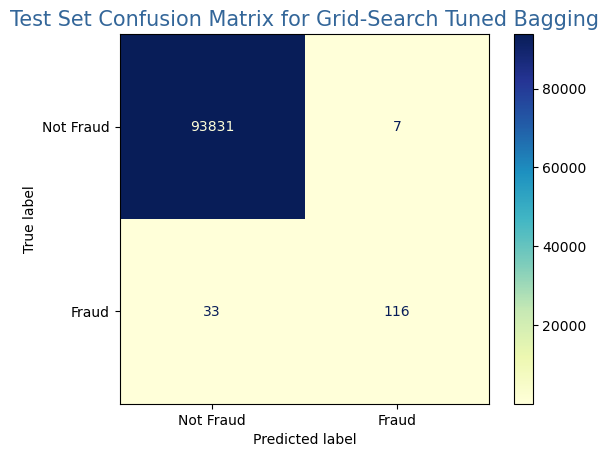

In [51]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned Bagging', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_Bagging_Grid_Tuned.png')

The untuned `BaggingClassifier` had 36 misclassifications on the test set, with 25 false negatives and 11 false positives, compared to 40 misclassifications, with 33 false negatives and 7 false positives, for the `BaggingClassifier` tuned with `GridSearchCV`. Therefore, if we recall, the performance of the `BaggingClassifier` tuned with `GridSearchCV` is exactly similar to that of the untuned `RandomForestClassifier`. Since we chose the best hyperparameters for maximizing weighted f1-score, we can expect the tuned `BaggingClassifier` to perform better on the test set than the untuned `BaggingClassifier`. However, this is not the case. Therefore, the tuned model performs slightly worse than the untuned model and using scikit-learn's default hyperparameters is the best option for this dataset.

Maybe if we tune the model with a different scoring metric, such as accuracy, we can improve the model's performance on the test set. However, accuracy for this dataset is not a good metric because the response variable is highly imbalanced. Therefore, we will not perform this experiment and conclude that the default set of hyperparameters are best for this dataset. Also, `GridSearchCV` took 13 minutes to train the different models with all combinations of specified hyperparameters (16). We will later see if we can obtain not only a better `BaggingClassifier` but also obtain it quicker with `RandomizedSearchCV`.

## XGBClassifier()


In [54]:
%%time

# defining parameter range
param_grid = {
    #'max_depth': [2, 5, 10, 20],
    #'max_leaves': [0, 1, 3, 5],
    'learning_rate': [1, 0.1, 0.01],
    #'n_estimators': [50, 100],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'gamma': [0, 0.5, 2, 5],
    #'min_child_weight': [0, 1, 3, 5],
}
  
grid = GridSearchCV(XGBClassifier(verbosity=0), param_grid, refit = True, verbose = 0, scoring='f1_weighted', cv = 5, n_jobs=-1)

grid.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/XGB_Grid_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(grid, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned XGBoost Test Set Accuracy: {0:.2f} %".format(100 * score))
  grid_predictions = pickle_model.predict(X_test)

The best parameters after tuning are:  {'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.1}
The best model after tuning looks like:  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Grid-Search Tuned XGBoost Test Set Accuracy: 99.96 %
CPU times: user 4.63 s, sys: 2.02 s, total: 6.64 

After performing `GridSearchCV`, the optimal hyperparameters for maximizing weighted f1-score for `XGBClassifier`, are:

1. 100 `n_estimators` (number of base estimators to boost or number of boosting rounds). This is the default value.
2. `learning_rate` is 0.1, between 0.01 and 1. The `learning_rate` makes the boosting process more or less conservative, e.g. to correct or boost more or less based on the results of the previously added tree.
3. `booster` is gbtree (default), which is a tree-based model. The other option is gblinear, which is a linear model and dart, which is a tree-based model with dropout regularization.
4. `gamma` is 0.5, which is the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

All other hyperparameters retain their default values.

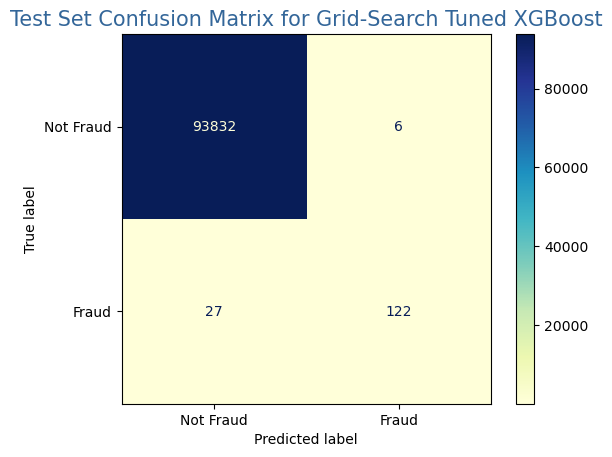

In [55]:
conf_matrix = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Grid-Search Tuned XGBoost', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_XGB_Grid_Tuned.png')

The `XGBClassifier` tuned with `GridSearchCV` predicts 1 false positive less than the untuned `XGBClassifier` on the test set. This is the only model that performs better on the test set after tuning its hyperparameters. However, the difference is not significant enough to warrant the computational cost of tuning the hyperparameters. Moreover, if it were a false negative instead of a false positive that got predicted accurately, then it could still make a case for considering the tuned model, given the business use case of avoiding fraudulent detections at any cost. Therefore, using `XGBClassifier`'s default hyperparameters is the best option for this dataset.

Maybe if we tune the model with a different scoring metric, such as accuracy, we can improve the model's performance on the test set. However, accuracy for this dataset is not a good metric because the response variable is highly imbalanced. Therefore, we will not perform this experiment and conclude that the default set of hyperparameters are best for this dataset. Also, `GridSearchCV` took 24 minutes to train the different models with all combinations of specified hyperparameters (36). We will later see if we can obtain not only a better `XGBClassifier` but also obtain it quicker with `RandomizedSearchCV`.

# Classification with RandomSearchCV (8 Points)

## RandomForestClassifier()


In [57]:
# defining parameter range
param_search = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 3, 5],
  'criterion': ["gini", "entropy"],
  'min_samples_leaf': [0.1, 0.3, 0.5],
  'max_features': [0.1*X_train.shape[1], 0.3*X_train.shape[1], 0.5*X_train.shape[1], X_train.shape[1]],
}
  
search = RandomizedSearchCV(RandomForestClassifier(), param_search, refit = True, verbose = 0, n_iter=25, scoring='f1_weighted', cv = 5, n_jobs=-1)

search.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",search.best_estimator_)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/RF_Rand_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(search, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Random Forest Test Set Accuracy: {0:.2f} %".format(100 * score))
  search_predictions = pickle_model.predict(X_test)

The best parameters after tuning are:  {'n_estimators': 200, 'min_samples_leaf': 0.3, 'max_features': 30, 'max_depth': 3, 'criterion': 'entropy'}
The best model after tuning looks like:  RandomForestClassifier(criterion='entropy', max_depth=3, max_features=30,
                       min_samples_leaf=0.3, n_estimators=200)
Grid-Search Tuned Random Forest Test Set Accuracy: 99.76 %


After performing `GridSearchCV`, the optimal hyperparameters for maximizing weighted f1-score for `RandomForestClassifier`, are:

1. 200 `n_estimators` (number of trees in the forest) compared to 50 for `GridSearchCV`. Although  increasing the number of trees in the forest should improve the model's performance on the test set, the performance remains the same. Therefore, 50 is a good number of trees to use for this dataset.
2. `max_depth` is 3, compared to None or until all leaves are pure for `GridSearchCV`. This is a good sign because it is not too high, which would increase the computational cost, and not too low, which would increase the bias of the model.
3. `critertion` is entropy, compared to gini for `GridSearchCV`.
4. `max_features` is 30, same as `GridSearchCV`.
5. `min_samples_leaf` is 0.3, compared to 0.1 for `GridSearchCV`. Therefore, `RandomizedSearchCV` suggests using 30% of the total number of samples in the dataset as the minimum number of samples for each node.

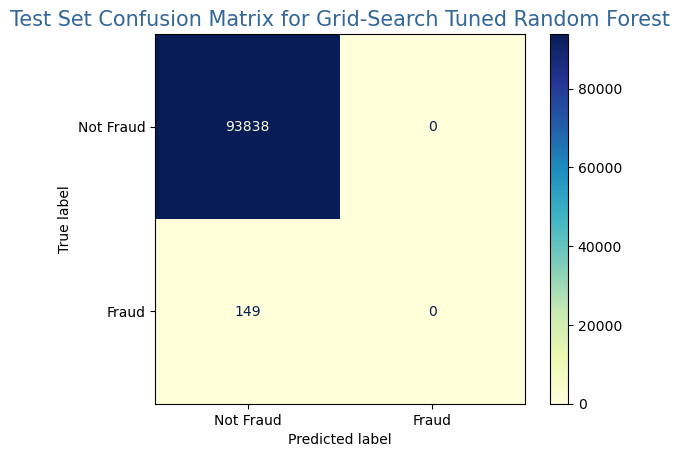

In [58]:
conf_matrix = confusion_matrix(y_test, search_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Random-Search Tuned Random Forest', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_RF_Rand_Tuned.png')

Most of the hyperparameter values outputted by `RandomizedSearchCV` differ from those of `GridSearchCV`. However, the performance of the `RandomForestClassifier` tuned with `RandomizedSearchCV` is exactly similar to that of the untuned `RandomForestClassifier`. Moreover, `RandomizedSearchCV` took 9 minutes compared to `GridSearchCV`'s 39 minutes to finish finding the best hyperparameters, in this case both leading to the same test accuracy. Therefore, using scikit-learn's default hyperparameters is the best option for this dataset when employing `RandomForestClassifier`.

## BaggingClassifier()


In [61]:
# defining parameter range
param_search = {
    # 'n_estimators': [50, 100, 200],
    # 'max_samples': [0.1*X_train.shape[0], 0.3*X_train.shape[0], 0.5*X_train.shape[0], X_train.shape[0]],
    # 'max_features': [0.1*X_train.shape[1], 0.3*X_train.shape[1], 0.5*X_train.shape[1], X_train.shape[1]],
    'bootstrap_features': [True, False],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'warm_start': [True, False],
}
  
search = RandomizedSearchCV(BaggingClassifier(verbose=0), param_search, refit = True, verbose = 0, n_iter=25, scoring='f1_weighted', cv = 5, n_jobs=-1)

search.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",search.best_estimator_)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/Bagging_Rand_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(search, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned Bagging Test Set Accuracy: {0:.2f} %".format(100 * score))
  search_predictions = pickle_model.predict(X_test)

/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/Tegveer/miniforge3/envs/ANLY501/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/Tegveer/miniforge3/envs/ANLY501/lib/p

The best parameters after tuning are:  {'warm_start': True, 'oob_score': False, 'bootstrap_features': True, 'bootstrap': False}
The best model after tuning looks like:  BaggingClassifier(bootstrap=False, bootstrap_features=True, warm_start=True)
Grid-Search Tuned Bagging Test Set Accuracy: 99.96 %


After performing `GridSearchCV`, the optimal hyperparameters for maximizing weighted f1-score for `BaggingClassifier`, are:

1. 10 `n_estimators` (number of `DecisionTreeClassifier`s in the ensemble) which is the default. This is a good sign because it is not too high, which would increase the computational cost, and not too low, which would increase the bias of the model.
2. `max_samples` is 1.0, signifying that all training samples are chosen to train each base estimator.
3. `max_features` is 1.0, which also signifies that all the features in `X_train` are chosen to train each base estimator.
5. `bootstrap` is False, compared to True outputted by `GridSearchCV`. This represents that samples are drawn without replacement, with each instance in the original dataset being selected only once in the formation of a subset for a base estimator. While this method ensures that each instance is used exactly once in the construction of each tree, it might lead to less diversity in the individual estimators and potentially limit the model's ability to generalize well on unseen data. 
6. `bootstrap_features` is True, same as `GridSearchCV`, which means that features are drawn with replacement. 
7. However using use out-of-bag samples to estimate the generalization error, as represented by `oob_score`, is not recommended for imbalanced datasets, hence the `BaggingClassifier` with `oob_score`=False is better at maximizing weighted f1-score.
8. Lastly, `warm_start` is True, compared to False outputted by `GridSearchCV`. Therefore, we reuse the solution of the previous call to fit and add more estimators to the ensemble. This could compensate for the lack of diversity in the individual estimators.

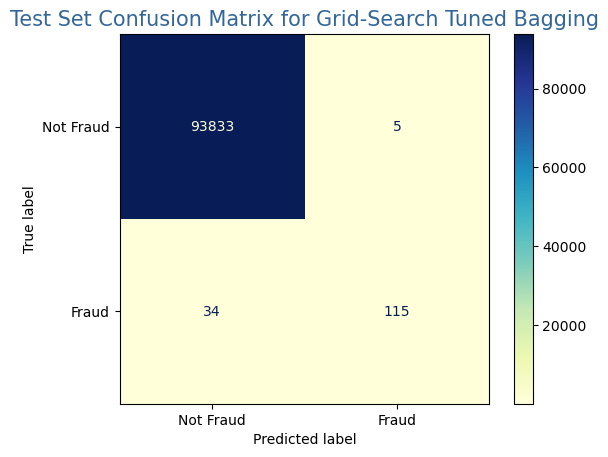

In [62]:
conf_matrix = confusion_matrix(y_test, search_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Random-Search Tuned Bagging', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_Bagging_Rand_Tuned.png')

The `BaggingClassifier` outputted by `RandomizedSearchCV` is slightly better than the one outputted by `GridSearchCV` as it has 2 fewer false positives but 1 more false negative. Still, the performance of the untuned `BaggingClassifier` is better than both the tuned `BaggingClassifier`s as it has much fewer false negatives, more suitable for production deployment in the real world. Moreover, both `RandomizedSearchCV` and `GridSearchCV`'s took 13 minutes to finish finding the best hyperparameters, in this case both leading to the same test accuracy. Therefore, using scikit-learn's default hyperparameters is the best option for this dataset when employing `BaggingClassifier`.

## XGBClassifier()


In [64]:
# defining parameter range
param_search = {
    #'max_depth': [2, 5, 10, 20],
    #'max_leaves': [0, 1, 3, 5],
    'learning_rate': [1, 0.1, 0.01],
    #'n_estimators': [50, 100],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'gamma': [0, 0.5, 2, 5],
    #'min_child_weight': [0, 1, 3, 5],
}
  
search = RandomizedSearchCV(XGBClassifier(verbosity=0), param_search, refit = True, verbose = 0, n_iter=25, scoring='f1_weighted', cv = 5, n_jobs=-1)

search.fit(X_train, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",search.best_estimator_)

# Save to file in the current working directory
pkl_filename = "products/pickle_files/XGB_Rand_Tuned.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(search, file)

# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
  score = pickle_model.score(X_test, y_test)
  print("Grid-Search Tuned XGBoost Test Set Accuracy: {0:.2f} %".format(100 * score))
  search_predictions = pickle_model.predict(X_test)

The best parameters after tuning are:  {'learning_rate': 0.1, 'gamma': 0.5, 'booster': 'dart'}
The best model after tuning looks like:  XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Grid-Search Tuned XGBoost Test Set Accuracy: 99.96 %


After performing `RandomizedSearchCV`, the optimal hyperparameters for maximizing weighted f1-score for `XGBClassifier`, are:

1. 100 `n_estimators` (number of base estimators to boost or number of boosting rounds). This is the default value.
2. `learning_rate` is 0.1, between 0.01 and 1. The `learning_rate` makes the boosting process more or less conservative, e.g. to correct or boost more or less based on the results of the previously added tree.
3. `booster` is dart, a tree-based model with dropout regularization, compared to gbtree outputted from `GridSearchCV`.
4. `gamma` is 0.5, same as `GridSearchCV`, which is the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

All other hyperparameters retain their default values.

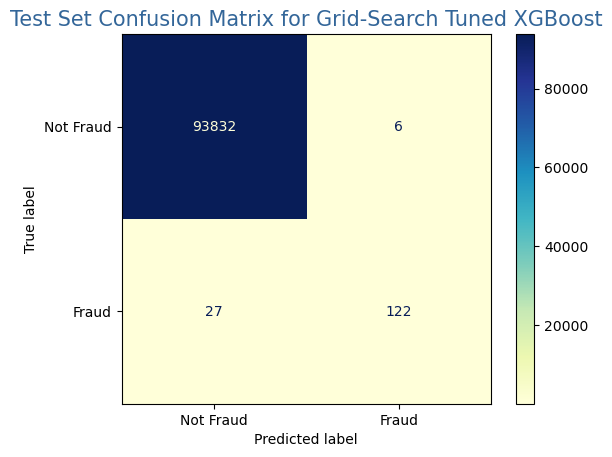

In [65]:
conf_matrix = confusion_matrix(y_test, search_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud','Fraud'], )

# save the plot

disp.plot(cmap='YlGnBu',values_format='d',ax=None)
plt.title('Test Set Confusion Matrix for Random-Search Tuned XGBoost', fontsize=15, color='#336699',loc='center')
plt.savefig('products/plots/confusion_matrix_XGB_Rand_Tuned.png')

It turns out that both `GridSearchCV` and `RandomizedSearchCV` output the same hyperparameter values for `XGBClassifier`, with the tuned model predicting a false positive lesser than the untuned `XGBClassifier`. Changing between gbtree and dart estimators did not affect the model's performance on the test set. Moreover, `RandomizedSearchCV` took 17 minutes compared to `GridSearchCV`'s 24 minutes to finish finding the best hyperparameters, in this case both leading to the same test accuracy. Therefore, using `RandomizedSearchCV`'s hyperparameters is the best option for this dataset when employing `XGBClassifier`. **This model, therefore, is also the best out of all tuned and untuned models for this dataset**.

# Comparison and Analysis (5 Points)

The individual model comparisons can be read through the comments between the code cells above. In this cell we summarize our findings and the best hyperparameters for each model. The best model for this dataset is the `XGBClassifier` tuned with `RandomizedSearchCV`. It has the highest weighted f1-score on the test set, which is the preferred metric for this dataset as it provides a more truthful representation than accuracy alone of the classifier's ability to capture the data's variability. Although it took double the time to train compared to `RandomForestClassifier` and 5 minutes more than `BaggingClassifier` when tuning with `RandomizedSearchCV`, it outputted the fewest false negatives, cases when the transaction was fraudulent but the model innacurately predicted so, on the test set. Therefore, it is the best model for this dataset.

The most peculiar case of tuning was showcased with `RandomForestClassifier`. The tuned model performed worse than the untuned model on the test set. This could be because the tuned model is overfitting the training data. Therefore, using scikit-learn's default hyperparameters is the best option for this dataset when employing `RandomForestClassifier`.

Best Hyperparameters for `RandomForestClassifier`:

1. 100 `n_estimators` (number of trees in the forest). 
2. `max_depth` is None, signifying the tree nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
3. `critertion` is gini, which is the default, and is chosen over entropy. Both are used to measure the quality of a split.
4. `max_features` is sqrt, which is the square root of all 30 features, 5 or 6, in the dataset. 
5. `min_samples_leaf` is 1, which suggests that a split point at any depth will only be considered if it leaves at least 1 training sample in each of the left and right branches.
6. `bootstrap` is True, which means that samples are drawn with replacement and this is generally a good idea for classification problems with imbalanced class distributions.
7. `oob_score` is False, which means that we do not use out-of-bag samples to estimate the generalization error.
8. Lastly, `warm_start` is False, which means that we just fit a whole new ensemble instead of reusing the solution of the previous call to fit and add more estimators to the ensemble.

Best Hyperparameters for `BaggingClassifier`:

1. 10 `n_estimators` (number of `DecisionTreeClassifier`s in the ensemble) which is the default. This is a good sign because it is not too high, which would increase the computational cost, and not too low, which would increase the bias of the model.
2. `max_samples` is 1.0, signifying that all training samples are chosen to train each base estimator.
3. `max_features` is 1.0, which also signifies that all the features in `X_train` are chosen to train each base estimator.
5. `bootstrap` is True, which means that samples are drawn with replacement and this is generally a good idea for classification problems with imbalanced class distributions.
6. `bootstrap_features` is False, which means that features are drawn without replacement.
7. However using use out-of-bag samples to estimate the generalization error, as represented by `oob_score`, is not recommended for imbalanced datasets, hence the `BaggingClassifier` with `oob_score`=False is better at maximizing weighted f1-score.
8. Lastly, `warm_start` is False, which means that it is fitting a whole new ensemble instead of reusing the solution of the previous call to fit and add more estimators to the ensemble.

Best Hyperparameters for `XGBClassifier`:

1. 100 `n_estimators` (number of base estimators to boost or number of boosting rounds). This is the default value.
2. `learning_rate` is 0.1, between 0.01 and 1. The `learning_rate` makes the boosting process more or less conservative, e.g. to correct or boost more or less based on the results of the previously added tree.
3. `booster` is dart, a tree-based model with dropout regularization, compared to gbtree outputted from `GridSearchCV`.
4. `gamma` is 0.5, same as `GridSearchCV`, which is the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

All other hyperparameters for `XGBClassifier` retain their default values.